In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
# load TikTokScraper classes
%run "/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_interface.ipynb"

# initialize sender class:
tt = Tiktok_I_ED(token_ED_API="2QW8YQyxFPXFUe9f")

In [4]:
# Creating Tiktok posts reading function

def read_tiktok(tt, hashtag_name, total_posts_to_retrieve, cursor=0):

    retrieved_posts = 0
    all_posts = []

    # read tiktok in batches
    while cursor < total_posts_to_retrieve:
        res, success =  tt.get_hashtag_posts(name=hashtag_name, cursor=cursor)
        if not success: break
        if 'data' in res.keys():
          all_posts.extend(res['data'])
        else:
          break
        if 'nextCursor' in res.keys():
          cursor = res['nextCursor']
          print(cursor)
        else:
          break

    df = pd.json_normalize(all_posts)
    print('a total of ' + str(len(df)) + ' posts have been collected out of '
                        + str(total_posts_to_retrieve))
    return df

In [5]:
# seting maximum post search criteria
total_posts_to_retrieve = 1000
hashtag = ["BarbieTheMovie"]

# reading post from tiktok
df = read_tiktok(tt, hashtag, total_posts_to_retrieve)

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
a total of 969 posts have been collected out of 1000


In [6]:
# Checking all the entries
for u in df.columns: print(u)

# selecting useful entries
final_df = df[['aweme_id','create_time',
               'desc','share_url','video.download_addr.url_list',
               'author_user_id','author.nickname',
               'statistics.comment_count','statistics.play_count',
               'statistics.share_count']]

# converting timestamp to a readable format
import datetime
final_df["create_time"] = [datetime.date.fromtimestamp(i) for i in final_df["create_time"]]

# storing to csv form
final_df.to_csv('/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_barbie_videos.csv', index=True)

# showing data
display(final_df)

anchors
author_user_id
aweme_id
aweme_type
banners
behind_the_song_music_ids
behind_the_song_video_music_ids
bodydance_score
branded_content_accounts
cha_list
challenge_position
cmt_swt
collect_stat
comment_topbar_info
commerce_config_data
content_desc
content_desc_extra
content_original_type
content_size_type
content_type
cover_labels
create_time
desc
desc_language
disable_search_trending_bar
distance
distribute_type
duration
follow_up_publish_from_id
geofencing
geofencing_regions
green_screen_materials
group_id
has_danmaku
has_vs_entry
have_dashboard
hybrid_label
image_infos
interaction_stickers
is_ads
is_description_translatable
is_hash_tag
is_nff_or_nr
is_on_this_day
is_pgcshow
is_preview
is_relieve
is_story
is_text_sticker_translatable
is_title_translatable
is_top
is_vr
item_comment_settings
item_duet
item_react
item_stitch
label_top_text
long_video
main_arch_common
mask_infos
misc_info
muf_comment_info_v2
music_begin_time_in_ms
music_end_time_in_ms
music_selected_from
music_title

<ipython-input-6-9056ebd1362b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["create_time"] = [datetime.date.fromtimestamp(i) for i in final_df["create_time"]]


,aweme_id,create_time,desc,share_url,video.download_addr.url_list,author_user_id,author.nickname,statistics.comment_count,statistics.play_count,statistics.share_count
0,7254251173597809963,2023-07-10,Los Angeles World Premiere 💖 #BarbieTheMovie,https://m.tiktok.com/v/7254251173597809963.htm...,[https://v19-us.tiktokcdn.com/ba962ec69d977635...,7125055275073848363,Barbie Movie,421,1087196,1066
1,7254220657850928430,2023-07-10,Heard everyone was feelin’ the Ken-rgy ✨ #Barb...,https://m.tiktok.com/v/7254220657850928430.htm...,[https://v19-us.tiktokcdn.com/0c372c1bdb9004c7...,7125055275073848363,Barbie Movie,15047,20017693,185660
2,7253114491892747562,2023-07-07,These Barbies can have it all 🎀 Hear @Fifty Fi...,https://m.tiktok.com/v/7253114491892747562.htm...,[https://v19-us.tiktokcdn.com/6d0d24aa7a9107b1...,7233526701191873578,Barbie The Album,191,145006,209
3,7254591405610388779,2023-07-11,We 👏 can’t 👏 wait 👏 #BarbieTheMovie only in th...,https://m.tiktok.com/v/7254591405610388779.htm...,[https://v19-us.tiktokcdn.com/da525d9c059c7768...,7125055275073848363,Barbie Movie,595,883428,698
4,7255317631840881963,2023-07-13,@BILLIE EILISH’s “What Was I Made For?” OUT NO...,https://m.tiktok.com/v/7255317631840881963.htm...,[https://v19-us.tiktokcdn.com/3ea5a632b0c5333e...,7233526701191873578,Barbie The Album,216,230121,455
...,...,...,...,...,...,...,...,...,...,...
964,7260537200582872321,2023-07-27,The smallest tiniest barbie cake #barbie #barb...,https://m.tiktok.com/v/7260537200582872321.htm...,[https://v16m-us.tiktokcdn.com/5592359812816cc...,6718310860979258373,Chahrazad’s Cuisine,170,1580294,383
965,7256622009306582278,2023-07-17,"Conocí a Margot Robbie, Ryan Gosling y America...",https://m.tiktok.com/v/7256622009306582278.htm...,[https://v16m-us.tiktokcdn.com/8c29da8f5f7762f...,6690056417544274950,✨ LuisaFerss 🧚🏼✨,301,490587,737
966,7257309661219556614,2023-07-18,First look at Dua Lipa with John Cena in Barbi...,https://m.tiktok.com/v/7257309661219556614.htm...,[https://v16m-us.tiktokcdn.com/5a40e684d50f5f7...,6802532390956925958,Dua Lipa Fans,338,947416,3214
967,7267225876767526177,2023-08-14,FROM EBAY EBAY EBAY EBAY EBAY 😭 #lalaland #fun...,https://m.tiktok.com/v/7267225876767526177.htm...,[https://v16m-us.tiktokcdn.com/6e48387e305b5bc...,7204457278145201157,☆,832,310850,9573


In [7]:
# Creating function to extract the tiktok comments from tiktok posts

def tiktok_comments(tt, aweme_id, total_comments_to_retrieve, cursor=0):

    retrieved_comments = 0
    all_comments = []
    isempty = True

    # read tiktok in batches
    while cursor < total_comments_to_retrieve:
        res, success =  tt.get_post_comments(aweme_id, cursor=cursor)
        if (not success)|(not res): break
        if 'comments' in res.keys():
          all_comments.extend(res['comments'])
          isempty = False
        else:
          break
        if 'nextCursor' in res.keys():
          cursor = res['nextCursor']
          print(cursor)
        else:
          break

    df = pd.json_normalize(all_comments)
    print('a total of ' + str(len(df)) + ' comments have been collected out of '
                        + str(total_comments_to_retrieve))
    return df, isempty

In [9]:
# setting search criteria for comments per each posts
total_comments_to_retrieve = 30

# reading data from tiktok
isempty = True
for i in range(len(final_df)):
  # changing account
  if (i==45):
    tt = Tiktok_I_ED(token_ED_API="gacx39wK0mxQl3CF")
  # getting comments
  if (final_df["statistics.comment_count"][i]>10):
    aweme_id = final_df["aweme_id"][i]
    df_tmp, isempty_tmp = tiktok_comments(tt,aweme_id,total_comments_to_retrieve)
    if (isempty_tmp == False):
      if (isempty == True):
        df1 = df_tmp
        isempty = False
      else:
        df1 = pd.concat([df1,df_tmp])

a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0

In [10]:
df1.head()

,author_pin,aweme_id,cid,collect_stat,comment_language,comment_post_item_ids,create_time,digg_count,image_list,is_author_digged,...,user.with_commerce_entry,user.with_fusion_shop_entry,user.with_shop_entry,user.youtube_channel_id,user.youtube_channel_title,user.youtube_expire_time,user.special_account.tt_now.tt_now_log_status,user.room_data,label_text,label_type
0,False,7254224392840940806,7254344696473027334,0,pt,None,1689033760,5018,None,False,...,False,False,False,,,0.0,NaN,NaN,NaN,NaN
1,False,7254224392840940806,7254344131811820294,0,pt,None,1689033637,1996,None,False,...,False,False,False,,,0.0,2.0,NaN,NaN,NaN
2,False,7254224392840940806,7254347047649526534,0,pt,None,1689034310,1878,None,False,...,False,False,False,,,0.0,NaN,NaN,NaN,NaN
3,False,7254224392840940806,7254707558097715973,0,pt,None,1689118243,1217,None,False,...,False,False,False,,,0.0,NaN,NaN,NaN,NaN
4,False,7254224392840940806,7254570108781150982,0,pt,None,1689086244,655,None,False,...,False,False,False,,,0.0,NaN,NaN,NaN,NaN


In [11]:
# see all entries
for u in df1.columns: print(u)

# select useful entries
final_df1 = df1[['aweme_id','cid','create_time',
                 'user.uid','user.nickname',
                 'text','reply_comment_total']]

# convert timestamp to a readable format
final_df1["create_time"] = [datetime.date.fromtimestamp(i) for i in final_df1["create_time"]]
# rename indexes
df1.index=range(len(df1))

# store to csv form
final_df1.to_csv('/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_barbie_replies.csv', index=True)

# show data
display(final_df1)

author_pin
aweme_id
cid
collect_stat
comment_language
comment_post_item_ids
create_time
digg_count
image_list
is_author_digged
label_list
no_show
reply_comment
reply_comment_total
reply_id
reply_to_reply_id
status
stick_position
text
text_extra
trans_btn_style
user_buried
user_digged
share_info.acl.code
share_info.acl.extra
share_info.desc
share_info.title
share_info.url
user.accept_private_policy
user.account_labels
user.account_region
user.ad_cover_url
user.advance_feature_item_order
user.advanced_feature_info
user.apple_account
user.authority_status
user.avatar_168x168.height
user.avatar_168x168.uri
user.avatar_168x168.url_list
user.avatar_168x168.url_prefix
user.avatar_168x168.width
user.avatar_300x300.height
user.avatar_300x300.uri
user.avatar_300x300.url_list
user.avatar_300x300.url_prefix
user.avatar_300x300.width
user.avatar_larger.height
user.avatar_larger.uri
user.avatar_larger.url_list
user.avatar_larger.url_prefix
user.avatar_larger.width
user.avatar_medium.height
user.avat

<ipython-input-11-b93ed71f540d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df1["create_time"] = [datetime.date.fromtimestamp(i) for i in final_df1["create_time"]]


,aweme_id,cid,create_time,user.uid,user.nickname,text,reply_comment_total
0,7254224392840940806,7254344696473027334,2023-07-11,6816801047463494661,nay,Se esse filme for ruim vai ser minha maior dec...,34
1,7254224392840940806,7254344131811820294,2023-07-11,7083981245458236422,Marcela,Ele vai ser um vilão com uma das melhores razõ...,26
2,7254224392840940806,7254347047649526534,2023-07-11,6580681242981908485,Jessica,só agora que reparei nele dando tudo de si na ...,2
3,7254224392840940806,7254707558097715973,2023-07-11,7066196094849975302,OrganizaSu,"""onde eu vejo um amor ela vê um amigo"" perai, ...",29
4,7254224392840940806,7254570108781150982,2023-07-11,6893865595059618821,alice 🦢,gente o filme tem 100% de aprovação no negocio...,17
...,...,...,...,...,...,...,...
25,7258975177302641926,7260729189518279429,2023-07-28,6918586013066920966,kim ᖭི༏ᖫྀ the author one 🧩🌀,@Bri • the arty one fully sobbef,2
26,7258975177302641926,7261509632764953371,2023-07-30,6812660819206816774,Kiera Brunger,@Gem this is what you were missing from Barbie 🥰,2
27,7258975177302641926,7261200891050378010,2023-07-29,6999546393359254534,x_Sowmya_x,@Inky this monologue made tear up,2
28,7258975177302641926,7261557574007571207,2023-07-30,7259686972783068166,shar,@aj,1


In [12]:
import numpy as np
from scipy.sparse import csr_matrix
import nltk
import matplotlib.pyplot as plt
import datetime
from datetime import date
import time
import pickle

In [13]:
%run "/content/drive/MyDrive/NetworkScience_Project/Tiktok/cleaning_mod.ipynb"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=6c421b1bec5c27cd342ad9b042abaaab41ad995281d02580bfef9e31f4c3ed4a
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.6 MB/s eta 0:00:00


# **Loading Tiktok data**

In [14]:
# Merging data from videos and comments
df = pd.read_csv("/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_barbie_replies.csv")
df2 = pd.read_csv("/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_barbie_videos.csv")
df.dropna(inplace=True)

In [15]:
df.head()

,Unnamed: 0,aweme_id,cid,create_time,user.uid,user.nickname,text,reply_comment_total
0,0,7254224392840940806,7254344696473027334,2023-07-11,6816801047463494661,nay,Se esse filme for ruim vai ser minha maior dec...,34
1,1,7254224392840940806,7254344131811820294,2023-07-11,7083981245458236422,Marcela,Ele vai ser um vilão com uma das melhores razõ...,26
2,2,7254224392840940806,7254347047649526534,2023-07-11,6580681242981908485,Jessica,só agora que reparei nele dando tudo de si na ...,2
3,3,7254224392840940806,7254707558097715973,2023-07-11,7066196094849975302,OrganizaSu,"""onde eu vejo um amor ela vê um amigo"" perai, ...",29
4,4,7254224392840940806,7254570108781150982,2023-07-11,6893865595059618821,alice 🦢,gente o filme tem 100% de aprovação no negocio...,17


In [16]:
df2.head()

,Unnamed: 0,aweme_id,create_time,desc,share_url,video.download_addr.url_list,author_user_id,author.nickname,statistics.comment_count,statistics.play_count,statistics.share_count
0,0,7254251173597809963,2023-07-10,Los Angeles World Premiere 💖 #BarbieTheMovie,https://m.tiktok.com/v/7254251173597809963.htm...,['https://v19-us.tiktokcdn.com/ba962ec69d97763...,7125055275073848363,Barbie Movie,421,1087196,1066
1,1,7254220657850928430,2023-07-10,Heard everyone was feelin’ the Ken-rgy ✨ #Barb...,https://m.tiktok.com/v/7254220657850928430.htm...,['https://v19-us.tiktokcdn.com/0c372c1bdb9004c...,7125055275073848363,Barbie Movie,15047,20017693,185660
2,2,7253114491892747562,2023-07-07,These Barbies can have it all 🎀 Hear @Fifty Fi...,https://m.tiktok.com/v/7253114491892747562.htm...,['https://v19-us.tiktokcdn.com/6d0d24aa7a9107b...,7233526701191873578,Barbie The Album,191,145006,209
3,3,7254591405610388779,2023-07-11,We 👏 can’t 👏 wait 👏 #BarbieTheMovie only in th...,https://m.tiktok.com/v/7254591405610388779.htm...,['https://v19-us.tiktokcdn.com/da525d9c059c776...,7125055275073848363,Barbie Movie,595,883428,698
4,4,7255317631840881963,2023-07-13,@BILLIE EILISH’s “What Was I Made For?” OUT NO...,https://m.tiktok.com/v/7255317631840881963.htm...,['https://v19-us.tiktokcdn.com/3ea5a632b0c5333...,7233526701191873578,Barbie The Album,216,230121,455


In [17]:
# Renaming the df
df = df[["create_time", "user.nickname", "text"]]
df = df.rename({'user.nickname': 'user', 'text': 'title'}, axis=1)

# Renaming the df2
df2 = df2[["create_time", "author.nickname", "desc"]]
df2 = df2.rename({'author.nickname': 'user', 'desc': 'title'}, axis=1)

# Merging the dataset
df = pd.concat([df, df2], ignore_index=True)

#Displaying the dataset
display(df)

,create_time,user,title
0,2023-07-11,nay,Se esse filme for ruim vai ser minha maior dec...
1,2023-07-11,Marcela,Ele vai ser um vilão com uma das melhores razõ...
2,2023-07-11,Jessica,só agora que reparei nele dando tudo de si na ...
3,2023-07-11,OrganizaSu,"""onde eu vejo um amor ela vê um amigo"" perai, ..."
4,2023-07-11,alice 🦢,gente o filme tem 100% de aprovação no negocio...
...,...,...,...
2431,2023-07-27,Chahrazad’s Cuisine,The smallest tiniest barbie cake #barbie #barb...
2432,2023-07-17,✨ LuisaFerss 🧚🏼✨,"Conocí a Margot Robbie, Ryan Gosling y America..."
2433,2023-07-18,Dua Lipa Fans,First look at Dua Lipa with John Cena in Barbi...
2434,2023-08-14,☆,FROM EBAY EBAY EBAY EBAY EBAY 😭 #lalaland #fun...


# **Cleaning Tiktok titles**

In [18]:
df.dropna(inplace=True)
# superficial cleaning
df['text_sup_clean'] = df['title'].apply(superficial_cleaning)

# deep cleaning
POS_KEEP = ["ADJ","ADV","NOUN","PROPN","VERB","NUM"] # we do not include "PRON"
df['text_deep_clean'] = df['text_sup_clean'].apply(deep_cleaning)
df['text_deep_clean_pos'] = df['text_sup_clean'].apply(deep_cleaning_pos)

# extract hashtags (if present)
df['hashtags'] = df['title'].apply(get_hashtags)

# display the result
display(df)

<ipython-input-13-6f1622b626a2>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(selftext, "html.parser")


,create_time,user,title,text_sup_clean,text_deep_clean,text_deep_clean_pos,hashtags
0,2023-07-11,nay,Se esse filme for ruim vai ser minha maior dec...,se esse filme for ruim vai ser minha maior dec...,se esse filme ruim vai ser minha maior decepca...,"[se PROPN, esse VERB, filme NOUN, ruim ADJ, va...",[]
1,2023-07-11,Marcela,Ele vai ser um vilão com uma das melhores razõ...,ele vai ser um vilao com uma das melhores razo...,ele vai ser vilao com uma das melhore razoe mu...,"[ele NOUN, vai PROPN, ser PROPN, vilao PROPN, ...",[]
2,2023-07-11,Jessica,só agora que reparei nele dando tudo de si na ...,so agora que reparei nele dando tudo de si na ...,agora que reparei nele dando tudo si pedalada ...,"[so ADV, agora PROPN, que PROPN, reparei PROPN...",[]
3,2023-07-11,OrganizaSu,"""onde eu vejo um amor ela vê um amigo"" perai, ...",onde eu vejo um amor ela ve um amigo perai o ...,onde eu vejo amor ela amigo perai o ken n e ms...,"[onde VERB, eu PROPN, vejo PROPN, amor PROPN, ...",[]
4,2023-07-11,alice 🦢,gente o filme tem 100% de aprovação no negocio...,gente o filme tem de aprovacao no negocio la d...,gente o filme tem aprovacao negocio la tomatoe...,"[gente NOUN, o NOUN, filme VERB, tem NOUN, apr...",[]
...,...,...,...,...,...,...,...
2431,2023-07-27,Chahrazad’s Cuisine,The smallest tiniest barbie cake #barbie #barb...,the smallest tiniest barbie cake,small tiny barbie cake,"[small ADJ, tiny ADJ, barbie PROPN, cake NOUN]","[barbie, barbiethemovie, barbiecake, satisfyin..."
2432,2023-07-17,✨ LuisaFerss 🧚🏼✨,"Conocí a Margot Robbie, Ryan Gosling y America...",conoci a margot robbie ryan gosling y america ...,conoci margot robbie ryan gosle y america ferr...,"[conoci PROPN, margot PROPN, robbie PROPN, rya...","[barbielapelicula, cineminuto, barbiepremiere,..."
2433,2023-07-18,Dua Lipa Fans,First look at Dua Lipa with John Cena in Barbi...,first look at dua lipa with john cena in barbi...,look dua lipa john cena barbie movie,"[first ADV, look VERB, dua PROPN, lipa ADJ, jo...","[dualipa, johncena, barbie, barbiethemovie, me..."
2434,2023-08-14,☆,FROM EBAY EBAY EBAY EBAY EBAY 😭 #lalaland #fun...,from ebay ebay ebay ebay ebay,ebay ebay ebay ebay ebay,"[ebay PROPN, ebay PROPN, ebay PROPN, ebay PROP...","[lalaland, funkopop, emmastone, ryangosling, r..."


In [19]:
mask = '2023-07-21'

df_after = df[df['create_time']>=mask]
df_after = df_after.reset_index(drop=True)

In [21]:
# storing the results
out_dir = "/content/drive/MyDrive/NetworkScience_Project/Tiktok/"
out_file = "tiktok_barbie_barbie"
df_after.to_excel(out_dir+out_file+"_after_cleaned.xlsx", index=True)

# **Building an occurrence matrix for words and hashtags**

In [22]:
# collection of words
words_after = np.unique([item for sublist in df_after['text_deep_clean_pos'] for item in sublist])
# words dictionary
words_dict_after = dict(zip(words_after,range(len(words_after))))
# occurrence matrix for words
Mwd_after = csr_matrix((len(words_dict_after), len(df_after)), dtype = np.int8).toarray()
for i in range(len(df_after)):
  for j in df_after['text_deep_clean_pos'][i]:
    Mwd_after[words_dict_after[j],i] += 1

In [23]:
# collection of hashtags
hashtags_after = np.unique([item for sublist in df_after['hashtags'] for item in sublist])
# add the # sign
hashtags2_after = np.unique(["#"+item for sublist in df_after['hashtags'] for item in sublist])
# hashtags dictionary
hashtags_dict_after = dict(zip(hashtags_after,range(len(hashtags_after))))
# occurrence matrix for hashtags
Mhd_after = csr_matrix((len(hashtags_dict_after), len(df_after)), dtype = np.int8).toarray()
for i in range(len(df_after)):
  for j in df_after['hashtags'][i]:
    Mhd_after[hashtags_dict_after[j],i] += 1

In [24]:
# join words and hashtags
Mwd_after = np.vstack((Mwd_after, Mhd_after)) # in one occurrence matrix
words_after = np.hstack((words_after, hashtags2_after)) # in one word+hashtags list
documents_after = np.array(df_after["user"].tolist()) # further collect documents names

# **Removing least occurring words**

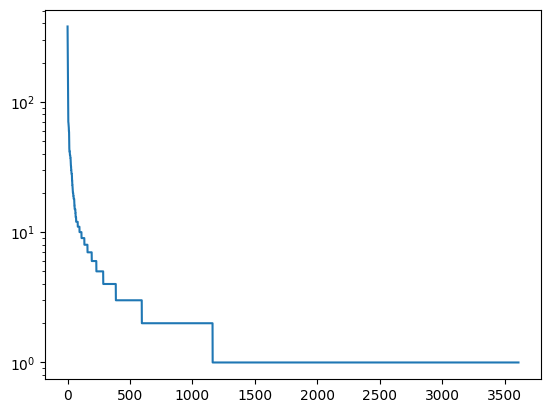

In [27]:
# display word occurrences first for after
plt.figure()
plt.semilogy(-np.sort(-np.sum(Mwd_after,axis=1)))
plt.savefig(out_dir+out_file+"_statistics_after.png")

In [28]:
# remove words that are used once or twice
select_after = (np.sum(Mwd_after,axis=1)>2)
Mwd_after = Mwd_after[select_after,:]
words_after = words_after[select_after]
# remove documents that do not contain words
select_after = (np.sum(Mwd_after,axis=0)>0)
Mwd_after = Mwd_after[:,select_after]
documents_after = documents_after[select_after]
# display final matrix size
display(Mwd_after.shape)

(595, 1048)

In [29]:
# store the result
pickle.dump([Mwd_after,words_after,documents_after], open(out_dir+out_file+"_after_occurrences.p", "wb"))

In [30]:
import pandas as pd
import numpy as np
import scipy
import scipy.sparse as sps
import matplotlib.pyplot as plt
!pip install louvain
import louvain
import igraph as ig
import time
import pickle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 14.5 MB/s eta 0:00:00


<ipython-input-30-a3a286e981b8>:7: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.
  import louvain


In [31]:
!pip install bertopic
from bertopic import BERTopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 55.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 14.9 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.8 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039290 sha256=beac26bbcb2088d6b75f77c9612f71f32296b9ca2ef9a649274a7629c1a9c49c
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-

# **Loading functions for probability matrices**

In [32]:
%run "/content/drive/MyDrive/NetworkScience_Project/Tiktok/communities_mod.ipynb"

bertopic 1.11
softlouvain v1.10


# **Load Tiktok data**

In [33]:
in_dir = "/content/drive/MyDrive/NetworkScience_Project/Tiktok/"
in_file = "tiktok_barbie_barbie_after"

# load word occurrences
Mwd, words, documents = pickle.load(open(in_dir+in_file+"_occurrences.p","rb"))
Mwd = sps.csr_matrix(Mwd)

# **Visualize the degree distribution of words and documents**

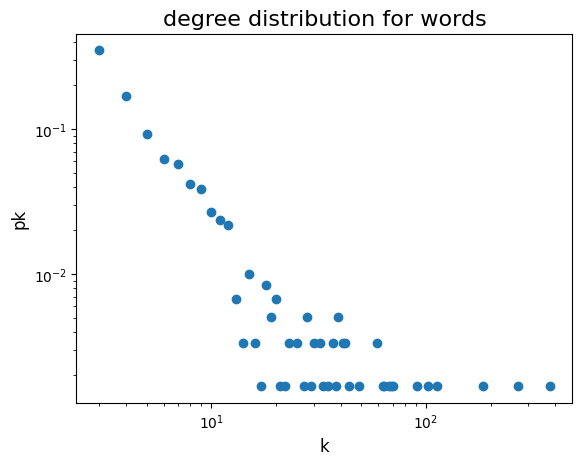

In [34]:
# degree distribution for words
dw = np.squeeze(np.asarray(Mwd.sum(axis=1))) # words degrees
k = np.unique(dw)
pk = np.histogram(dw,np.append(k,k[-1]+1))[0]
pk = pk/pk.sum()
Pk = 1-np.cumsum(pk)
fig = plt.figure()
plt.loglog(k,pk,'o')
plt.title("degree distribution for words", size=16)
plt.xlabel("k", size=12)
plt.ylabel("pk", size=12)
plt.show()

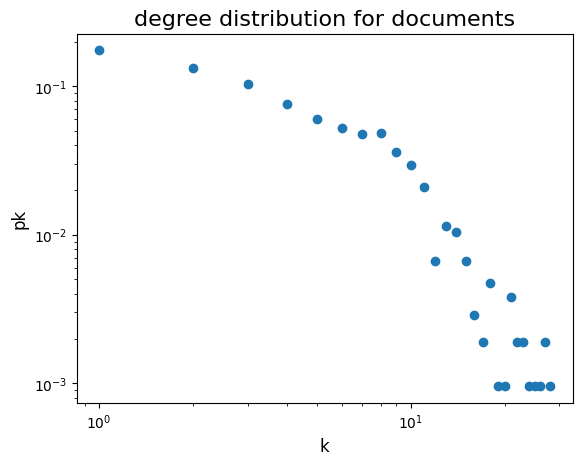

In [35]:
# degree distribution for documents
dd = np.squeeze(np.asarray(Mwd.sum(axis=0))) # documents degrees
k = np.unique(dd)
pk = np.histogram(dd,np.append(k,k[-1]+1))[0]
pk = pk/pk.sum()
Pk = 1-np.cumsum(pk)
fig = plt.figure()
plt.loglog(pk,'o')
plt.title("degree distribution for documents", size=16)
plt.xlabel("k", size=12)
plt.ylabel("pk", size=12)
plt.show()

# **Build probability matrices from words occurrences**

In [36]:
# remove elements that are too central
# remove documents and words with fewer than 2 links
Mwd, words, documents = clean_Mwd_matrix(Mwd,words,documents)

removing: #barbie #barbiethemovie edible ADJ ma PROPN  


In [37]:
# build probability matrices
# set tform=True for TF-IDF matrices
Pwd, Pww, Pdd, Paa = probability_matrices(Mwd, tform=False)

# **Assign documents to topics using Louvain**
i.e., run Louvain community detection on Pdd

In [38]:
# start a time counter
tic = time.time()

# build a graph based on Pdd as adjacency matrix
A = sps.csr_matrix(Pdd)
G = ig.Graph.Adjacency((A > 0).toarray().tolist())
G.es['weight'] = np.array(A[A.nonzero()])[0]

# run Louvain on the graph to get a partition
part = louvain.find_partition(G, louvain.ModularityVertexPartition,
                                 weights='weight')

# function to map the partition into a community assignment matrix C
# where rows represent documents, and columns represent topic*s
def partition_to_C(part):
  C = sps.csr_matrix((Pdd.shape[0],len(part)))
  for i in range(len(part)):
    C[np.array(part[i]),i] = 1
  return C

# map the partition into a community assignment matrix C
C_l = partition_to_C(part)

# capture execution time
et_louv = time.time()-tic

# refine with soft Louvain
C_sl, _, _ = my_soft_louvain(Pdd, C_l)

# capture execution time
et_slouv = time.time()-tic

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[852, 852]
83.43860018001253
21.213203435596434
12.727922061357859
8.485281374238571
5.656854249492381
7.0710678118654755
0.0
[852, 16]
7.0710678118654755
0.0
[852, 14]
0.0


# **Assign documents to topics using BERTopic**
i.e., run BERTopic detection on superficially cleaned text

In [39]:
# load text
df2 = pd.read_excel(in_dir+in_file+"_cleaned.xlsx")
df2["user"] = np.array([str(i) for i in df2["user"]])
# remove those documents that do not appear in Pcc
documents = np.array([str(i) for i in documents])
df2 = df2.loc[df2['user'].isin(documents)]
dropping_number = df2["user"].shape[0] - len(documents)
df2.drop(df2.tail(dropping_number).index, inplace=True)
df2.index = np.array(range(len(df2)))

# workaround to reinsert hashtags (if any) in the cleaned text
df2["text_deep_clean2"] = [str(df2["text_deep_clean"][i]) + " #" +
                           df2["hashtags"][i][2:-2].replace("', '"," #")
                           for i in range(len(df2))]

In [40]:
# start a time counter
tic = time.time()

# prepare a BERTopic instance
bert_model = BERTopic()

# run BERTopic
docs = list(df2["title"])
topics, probabilities = bert_model.fit_transform(docs)

# reduce the number of topics only in case it is needed!
# topics = bert_model.reduce_outliers(docs, topics)

# function to map the topis into a community assignment matrix C
# where rows represent documents, and columns represent topics
def topics_to_C(topics):
  # extract community assignments
  C = sps.csr_matrix((len(topics),max(topics)+2))
  for i in range(C.shape[1]):
    C[np.array(topics)==(i-1),i] = 1
  # remove zero assignments
  C = C[:,np.unique(scipy.sparse.find(C)[1])]
  return C

# map the topics into a community assignment matrix C
C_b = topics_to_C(topics)

# capture execution time
et_bert = time.time()-tic

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


# **Evaluate NMI, modulartity, Ncut, and Infomap metrics**

In [41]:
# prepare a template dataframe for collecting the results
df = pd.DataFrame(data={'data':[],'algo':[],'time':[],'c#':[],
                        'NMI':[],'Q':[],'Ncut':[],'InfoMap':[]})

# identify the infomap ranking vector
r = infomap_rank(Pdd)

In [42]:
# hard Louvain: evaluate the statistics of interest
stats = clustering_statistics(C_l,Pwd,Pdd,r)
# store them into the dataframe
df.loc[len(df)] = [in_file,"hard Louvain Pdd",et_louv,C_l.shape[1]] + stats

# soft Louvain: evaluate the statistics of interest
stats = clustering_statistics(C_sl,Pwd,Pdd,r)
# store them into the dataframe
df.loc[len(df)] = [in_file,"soft Louvain Pdd",et_slouv,C_sl.shape[1]] + stats

# BERTopic: evaluate the statistics of interest
stats = clustering_statistics(C_b,Pwd,Pdd,r)
# store them into the dataframe
df.loc[len(df)] = [in_file,"BERTopic",et_bert,C_b.shape[1]] + stats

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [43]:
# display the result
display(df.head(3))

,data,algo,time,c#,NMI,Q,Ncut,InfoMap
0,tiktok_barbie_barbie_after,hard Louvain Pdd,0.610573,16,0.632520,0.484390,0.401066,-0.047151
1,tiktok_barbie_barbie_after,soft Louvain Pdd,6.487092,14,0.637418,0.485949,0.380657,-0.044297
2,tiktok_barbie_barbie_after,BERTopic,55.012207,2,0.337054,0.074927,0.343007,0.023965


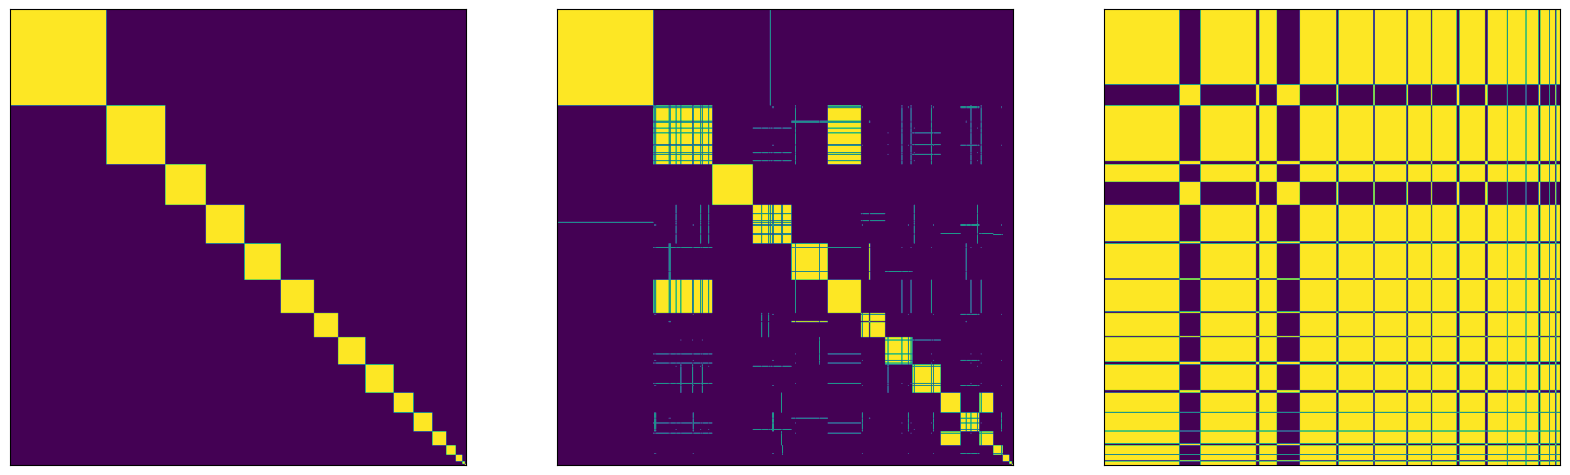

In [44]:
# show community patterns and their relations
plot_community_patterns([C_l,C_sl,C_b],nrows=1,ncols=3,refs=[0,2])

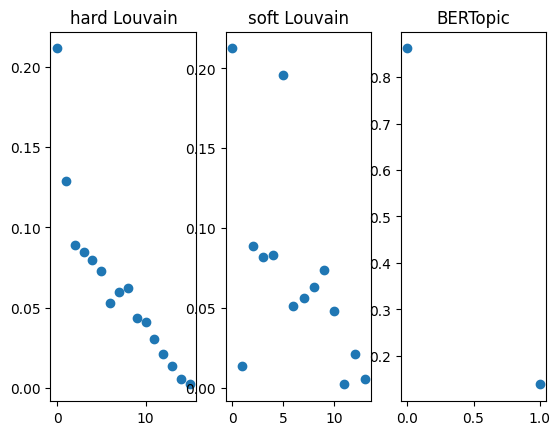

In [45]:
# show number of documents per community
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(np.array(C_l.sum(axis=0))[0]/C_l.sum(),'o')
ax1.set_title('hard Louvain')
ax2.plot(np.array(C_sl.sum(axis=0))[0]/C_sl.sum(),'o')
ax2.set_title('soft Louvain')
ax3.plot(np.array(C_b.sum(axis=0))[0]/C_b.sum(),'o')
ax3.set_title('BERTopic');

# **Visualize the result using BERTopic tools**

In [46]:
# Louvain first

# use the clean text in order to get a more meaningful description
docs = list(df2["text_deep_clean2"])
bert_model1 = bertopic_overwrite(bert_model,docs,C_l)

# visualize topic description
bert_model1.visualize_barchart(topics = range(C_l.shape[1]),
                               n_words = 8,
                               title = "Louvain results")

In [47]:
# BERTopic second

# use the clean text in order to get a more meaningful description
docs = list(df2["text_deep_clean2"])
bert_model2 = bertopic_overwrite(bert_model,docs,C_b)

# visualize topic description
bert_model2.visualize_barchart(topics = range(C_b.shape[1]),
                               n_words = 8,
                               title = "BERTopic results")

In [48]:
topics = bert_model1.get_topics()
print(topics)

{0: [('barbiethemovie', 0.056444089964132395), ('barbie', 0.047191351513769096), ('barbiemovie', 0.02970469631613099), ('fyp', 0.028961449389380643), ('margotrobbie', 0.027180041158455674), ('barbiegirl', 0.02548429706719941), ('ken', 0.020962286977638075), ('ryangosling', 0.018572515649577806), ('barbiemovies', 0.01758269155694951), ('barbieedit', 0.017328905971600413)], 1: [('movie', 0.06103966965352676), ('like', 0.048970277122366505), ('de', 0.04767589100979471), ('good', 0.046245269386492246), ('watch', 0.04579663002473171), ('barbie', 0.04533641422424662), ('want', 0.03665441024490582), ('sua', 0.030514032979827976), ('ben', 0.030132105987705198), ('pra', 0.029449852460849246)], 2: [('eu', 0.050906357822995664), ('que', 0.04170274749571562), ('filme', 0.03941480601879429), ('barbie', 0.03440458586094669), ('nao', 0.033644953893027366), ('barbiethemovie', 0.029629874730591806), ('barbiemovie', 0.025112255965033907), ('de', 0.024757851379668905), ('esse', 0.02352000331305061), ('se

In [49]:
topics = bert_model1.get_topics()
new_df = pd.DataFrame.from_dict(topics, orient='index')

ktopics = []

for topic_list in range(0, new_df.shape[1]):
  for topic in range(0, new_df.shape[0]):
      ktopics.append(new_df[topic_list][topic][0])

unique_ktopics  = set(ktopics)
topics_ktopics = list(unique_ktopics)

In [50]:
# Load the CSV file
df = pd.read_excel("/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_barbie_barbie_after_cleaned.xlsx")

# Extract all keywords from the BERT model's output
keywords = topics_ktopics
df["hashtags_2"] = None
for i in range(len(df["text_deep_clean"])):
  if isinstance(df["text_deep_clean"][i], str):  # Check if text is a string
    hashtags2 = []

    for word in df["text_deep_clean"][i].split():

      if word in keywords:
        #  print(type(word))
          hashtags2.append(str(word))
          df["hashtags_2"][i] = hashtags2


In [51]:
df.to_pickle('/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_barbie_barbie_after_hashtag.pkl')

In [52]:
df.head()

,Unnamed: 0,create_time,user,title,text_sup_clean,text_deep_clean,text_deep_clean_pos,hashtags,hashtags_2
0,0,2023-07-24,Edward hi Finland,When the minions came out:🕴️🗿🍷 When the barbie...,when the minions came out when the barbie movi...,minion come barbie movie come,"['minion NOUN', 'come VERB', 'barbie PROPN', '...",[],"[come, barbie, movie, come]"
1,1,2023-07-21,syd 💋,I went and the WHOLE THEATRE was dress in pink 😭,i went and the whole theatre was dress in pink,theatre dress pink,"['go VERB', 'whole ADJ', 'theatre NOUN', 'dres...",[],"[theatre, dress, pink]"
2,2,2023-07-23,Omar,The marketing for this movie is wild,the marketing for this movie is wild,marketing movie wild,"['marketing NOUN', 'movie NOUN', 'wild ADJ']",[],[movie]
3,3,2023-07-21,M,just got cruyff out of icon pack,just got cruyff out of icon pack,cruyff icon pack,"['just ADV', 'get VERB', 'cruyff ADJ', 'icon N...",[],None
4,4,2023-07-23,︎Foxy The Pirate,does that mean for the fnaf movie we can be sp...,does that mean for the fnaf movie we can be sp...,mean fnaf movie springtrap,"['mean VERB', 'fnaf NOUN', 'movie NOUN', 'spri...",[],"[mean, movie]"


In [53]:
comments_df = pd.read_pickle("/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_barbie_barbie_after_hashtag.pkl")
comments_df.head()

,Unnamed: 0,create_time,user,title,text_sup_clean,text_deep_clean,text_deep_clean_pos,hashtags,hashtags_2
0,0,2023-07-24,Edward hi Finland,When the minions came out:🕴️🗿🍷 When the barbie...,when the minions came out when the barbie movi...,minion come barbie movie come,"['minion NOUN', 'come VERB', 'barbie PROPN', '...",[],"[come, barbie, movie, come]"
1,1,2023-07-21,syd 💋,I went and the WHOLE THEATRE was dress in pink 😭,i went and the whole theatre was dress in pink,theatre dress pink,"['go VERB', 'whole ADJ', 'theatre NOUN', 'dres...",[],"[theatre, dress, pink]"
2,2,2023-07-23,Omar,The marketing for this movie is wild,the marketing for this movie is wild,marketing movie wild,"['marketing NOUN', 'movie NOUN', 'wild ADJ']",[],[movie]
3,3,2023-07-21,M,just got cruyff out of icon pack,just got cruyff out of icon pack,cruyff icon pack,"['just ADV', 'get VERB', 'cruyff ADJ', 'icon N...",[],None
4,4,2023-07-23,︎Foxy The Pirate,does that mean for the fnaf movie we can be sp...,does that mean for the fnaf movie we can be sp...,mean fnaf movie springtrap,"['mean VERB', 'fnaf NOUN', 'movie NOUN', 'spri...",[],"[mean, movie]"


In [54]:
comments_filtered = comments_df.copy()
column_list = ["user","create_time", "text_deep_clean", "text_deep_clean_pos", "hashtags_2"]
comments_filtered = comments_filtered[column_list]

In [55]:
comments_filtered

,user,create_time,text_deep_clean,text_deep_clean_pos,hashtags_2
0,Edward hi Finland,2023-07-24,minion come barbie movie come,"['minion NOUN', 'come VERB', 'barbie PROPN', '...","[come, barbie, movie, come]"
1,syd 💋,2023-07-21,theatre dress pink,"['go VERB', 'whole ADJ', 'theatre NOUN', 'dres...","[theatre, dress, pink]"
2,Omar,2023-07-23,marketing movie wild,"['marketing NOUN', 'movie NOUN', 'wild ADJ']",[movie]
3,M,2023-07-21,cruyff icon pack,"['just ADV', 'get VERB', 'cruyff ADJ', 'icon N...",None
4,︎Foxy The Pirate,2023-07-23,mean fnaf movie springtrap,"['mean VERB', 'fnaf NOUN', 'movie NOUN', 'spri...","[mean, movie]"
...,...,...,...,...,...
1188,Victoria Lanz,2023-07-22,NaN,[],None
1189,jaice,2023-08-04,jumpin mettaton,"['jumpin VERB', 'see VERB', 'mettaton PROPN', ...",None
1190,Chahrazad’s Cuisine,2023-07-27,small tiny barbie cake,"['small ADJ', 'tiny ADJ', 'barbie PROPN', 'cak...","[barbie, cake]"
1191,☆,2023-08-14,ebay ebay ebay ebay ebay,"['ebay PROPN', 'ebay PROPN', 'ebay PROPN', 'eb...",None


In [56]:
#initialize an empty dict
unique_words = {}
for row in comments_filtered["text_deep_clean"]:
    if pd.notna(row):
        # Split the row into words and iterate over them
        for word in row.split(" "):
            #if the word is encountered for the first time add to dict as key and set its value to 0
            unique_words.setdefault(word,0)
            #increase the value (i.e the count) of the word by 1 every time it is encountered
            unique_words[word] += 1

In [57]:
uw_df = pd.DataFrame.from_dict(unique_words, orient='index').reset_index()
uw_df.rename(columns = {'index':'Word', 0:'Count'}, inplace=True)
uw_df.sort_values(by=['Count'], ascending=False, inplace=True)
uw_df

,Word,Count
2,barbie,313
3,movie,113
126,love,67
106,ken,47
18,watch,41
...,...,...
964,lmfao,1
963,page,1
962,scrapbook,1
961,disappointing,1


In [58]:
unique_hashtags = {}


for idx, row in comments_filtered.iterrows():
  hashtag_list = []
  try:
    for hashtag in row["hashtags_2"]:
      unique_hashtags.setdefault("#"+hashtag, 0)
      unique_hashtags['#'+hashtag] += 1
      hashtag_list.append(hashtag)
  except:
      continue


In [59]:
unique_hashtags

{'#come': 11,
 '#barbie': 313,
 '#movie': 113,
 '#theatre': 10,
 '#dress': 9,
 '#pink': 30,
 '#mean': 3,
 '#cinema': 8,
 '#watch': 41,
 '#think': 25,
 '#little': 11,
 '#giggle': 2,
 '#want': 29,
 '#right': 13,
 '#look': 41,
 '#real': 9,
 '#like': 18,
 '#today': 7,
 '#good': 37,
 '#soon': 8,
 '#know': 25,
 '#theme': 3,
 '#cake': 5,
 '#exactly': 5,
 '#accountant': 9,
 '#ken': 47,
 '#dream': 10,
 '#wrong': 3,
 '#love': 67,
 '#margot': 14,
 '#card': 5,
 '#need': 28,
 '#thing': 9,
 '#girl': 12,
 '#kenough': 11,
 '#child': 4,
 '#beach': 5,
 '#horse': 16,
 '#literally': 9,
 '#gosle': 3,
 '#nao': 12,
 '#eu': 19,
 '#de': 36,
 '#que': 34,
 '#por': 6,
 '#filme': 19,
 '#pra': 12,
 '#esse': 11,
 '#ser': 5,
 '#song': 16,
 '#blow': 4,
 '#buy': 4,
 '#juice': 4,
 '#feel': 12,
 '#beautiful': 10,
 '#fan': 7,
 '#world': 11,
 '#future': 4,
 '#designer': 2,
 '#create': 3,
 '#cute': 6,
 '#diy': 2,
 '#allan': 28,
 '#dance': 16,
 '#speed': 4,
 '#drive': 4,
 '#start': 3,
 '#pc': 4,
 '#fallout': 2,
 '#case': 3,


In [60]:
uh_df = pd.DataFrame.from_dict(unique_hashtags, orient='index').reset_index()
uh_df.rename(columns = {'index':'Hashtag', 0:'Count'}, inplace=True)
uh_df.sort_values(by=['Count'], ascending=False, inplace=True)

In [61]:
uh_df

,Hashtag,Count
1,#barbie,313
2,#movie,113
28,#love,67
25,#ken,47
8,#watch,41
...,...,...
89,#ahii,1
84,#camila,1
81,#butt,1
74,#steal,1


## Building the network

We are going to use the networkx library, which is a Python library that enables network science analysis of the data.

We are going to use it to create our network and extract edgelist from it, since we can easily import it to Gephi (a software we are going to see in visualization labs).

However, it offers implemented algorithms for analysis (for example PageRank) that you can use out-of-box to analyze your network.

In [62]:
import itertools
import networkx as nx

In [63]:
unique_hashtags

{'#come': 11,
 '#barbie': 313,
 '#movie': 113,
 '#theatre': 10,
 '#dress': 9,
 '#pink': 30,
 '#mean': 3,
 '#cinema': 8,
 '#watch': 41,
 '#think': 25,
 '#little': 11,
 '#giggle': 2,
 '#want': 29,
 '#right': 13,
 '#look': 41,
 '#real': 9,
 '#like': 18,
 '#today': 7,
 '#good': 37,
 '#soon': 8,
 '#know': 25,
 '#theme': 3,
 '#cake': 5,
 '#exactly': 5,
 '#accountant': 9,
 '#ken': 47,
 '#dream': 10,
 '#wrong': 3,
 '#love': 67,
 '#margot': 14,
 '#card': 5,
 '#need': 28,
 '#thing': 9,
 '#girl': 12,
 '#kenough': 11,
 '#child': 4,
 '#beach': 5,
 '#horse': 16,
 '#literally': 9,
 '#gosle': 3,
 '#nao': 12,
 '#eu': 19,
 '#de': 36,
 '#que': 34,
 '#por': 6,
 '#filme': 19,
 '#pra': 12,
 '#esse': 11,
 '#ser': 5,
 '#song': 16,
 '#blow': 4,
 '#buy': 4,
 '#juice': 4,
 '#feel': 12,
 '#beautiful': 10,
 '#fan': 7,
 '#world': 11,
 '#future': 4,
 '#designer': 2,
 '#create': 3,
 '#cute': 6,
 '#diy': 2,
 '#allan': 28,
 '#dance': 16,
 '#speed': 4,
 '#drive': 4,
 '#start': 3,
 '#pc': 4,
 '#fallout': 2,
 '#case': 3,


In [64]:
uh = unique_hashtags.keys()
uw = unique_words.keys()

In [65]:
import numpy as np
network = {}
for index, row in comments_filtered.iterrows():
    combined_list = row['hashtags_2']  # Use keys() to get the list of unique subreddits
    if isinstance(combined_list, list):
      for pair in itertools.product(combined_list, combined_list):
          if pair[0] != pair[1] and not (pair[::-1] in network):
              #breakpoint()
              network.setdefault(pair, 0)
              # Update the weight based on actual occurrences
              network[pair] += 1

network_df = pd.DataFrame.from_dict(network, orient="index")

network

{('come', 'barbie'): 6,
 ('come', 'movie'): 2,
 ('barbie', 'movie'): 62,
 ('theatre', 'dress'): 1,
 ('theatre', 'pink'): 3,
 ('dress', 'pink'): 1,
 ('mean', 'movie'): 1,
 ('dress', 'cinema'): 1,
 ('movie', 'watch'): 12,
 ('think', 'little'): 1,
 ('think', 'giggle'): 2,
 ('think', 'theatre'): 1,
 ('little', 'giggle'): 2,
 ('little', 'theatre'): 1,
 ('giggle', 'theatre'): 2,
 ('want', 'right'): 1,
 ('want', 'cinema'): 1,
 ('right', 'cinema'): 1,
 ('watch', 'barbie'): 10,
 ('look', 'barbie'): 24,
 ('look', 'real'): 6,
 ('real', 'barbie'): 8,
 ('cinema', 'movie'): 1,
 ('cinema', 'today'): 1,
 ('movie', 'today'): 3,
 ('movie', 'good'): 15,
 ('pink', 'barbie'): 14,
 ('barbie', 'right'): 1,
 ('soon', 'pink'): 3,
 ('pink', 'know'): 3,
 ('know', 'barbie'): 15,
 ('soon', 'barbie'): 13,
 ('movie', 'theme'): 1,
 ('movie', 'cake'): 1,
 ('theme', 'cake'): 2,
 ('soon', 'know'): 3,
 ('know', 'come'): 1,
 ('know', 'want'): 4,
 ('barbie', 'want'): 13,
 ('come', 'want'): 2,
 ('exactly', 'think'): 1,
 ('e

In [66]:
network_df.reset_index(inplace=True)
network_df.columns = ["pair","weight"]
network_df.sort_values(by="weight",inplace=True, ascending=False)
network_df

,pair,weight
2,"(barbie, movie)",62
90,"(barbie, de)",41
89,"(de, que)",27
105,"(de, pra)",26
412,"(barbie, pra)",25
...,...,...
227,"(good, beautiful)",1
225,"(girl, ken)",1
224,"(horse, girl)",1
222,"(think, horse)",1


In [67]:
#to get weighted graph we need a list of 3-element tuplels (u,v,w) where u and v are nodes and w is a number representing weight
up_weighted = []
for edge in network:
    #we can filter edges by weight by uncommenting the next line and setting desired weight threshold
    #if(network[edge])>1:
    up_weighted.append((edge[0],edge[1],network[edge]))

G = nx.Graph()
G.add_weighted_edges_from(up_weighted)

In [68]:
print(len(G.nodes()))
print(len(G.edges()))

93
478


In [69]:
filename = "/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_edgelist_barbie_after_released.csv"

In [70]:
nx.write_weighted_edgelist(G, filename, delimiter=",")

In [71]:
word_nodes = pd.DataFrame.from_dict(unique_words,orient="index")
word_nodes.reset_index(inplace=True)
word_nodes["Label"] = word_nodes["index"]
word_nodes.rename(columns={"index":"Id",0:"delete"},inplace=True)
word_nodes = word_nodes.drop(columns=['delete'])

word_nodes

,Id,Label
0,minion,minion
1,come,come
2,barbie,barbie
3,movie,movie
4,theatre,theatre
...,...,...
2134,small,small
2135,tiny,tiny
2136,ebay,ebay
2137,sincera,sincera


In [72]:
hashtag_nodes = uh_df.copy()
hashtag_nodes["Label"] = hashtag_nodes["Hashtag"]
hashtag_nodes.rename(columns={"Hashtag":"Id"},inplace=True)
hashtag_nodes = hashtag_nodes.drop(columns=['Count'])
hashtag_nodes

,Id,Label
1,#barbie,#barbie
2,#movie,#movie
28,#love,#love
25,#ken,#ken
8,#watch,#watch
...,...,...
89,#ahii,#ahii
84,#camila,#camila
81,#butt,#butt
74,#steal,#steal


In [73]:
nodelist = hashtag_nodes
nodelist.to_csv("/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_nodelist_barbie_after_released.csv",index=False)

In [74]:
a = pd.read_csv("/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_edgelist_barbie_after_released.csv")
a

,come,barbie,6
0,come,movie,2
1,come,know,1
2,come,want,2
3,come,credit,1
4,come,card,2
...,...,...,...
472,wrong,break,1
473,wrong,perfect,1
474,promise,perfect,2
475,break,perfect,1


In [75]:
a.columns = ['Source','Target','Label']

In [76]:
a

,Source,Target,Label
0,come,movie,2
1,come,know,1
2,come,want,2
3,come,credit,1
4,come,card,2
...,...,...,...
472,wrong,break,1
473,wrong,perfect,1
474,promise,perfect,2
475,break,perfect,1


In [77]:
a.to_csv("/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_edgelist_barbie_after_released.csv",index=False)